# **TikTok Project**
**Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. We will complete the following questions.

# **Regression modeling**

In this activity, we will build a logistic regression model in Python. As we have learned, logistic regression helps us estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows us to consider more than one variable against the variable we're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.

<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, we will complete an executive summary using the questions listed on the PACE Strategy Document.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, we'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder

# Import packages for data modeling
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Import the statsmodel module.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Setup theme display
# sns.set_theme(color_codes=True)

# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.3f}'.format

Load the TikTok dataset.

In [3]:
# Load dataset into dataframe
df = pd.read_csv("../data/tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?

::: {.callout-tip title="Some purposes of EDA before constructing a logistic regression model:"}

- Data Understanding
- Data Cleaning
- Feature Engineerin
- Visualization of Relationship
- Identify Patterns and Trends
- Handling Imbalances
- Assumption Checking
- Model Selections

:::

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,"343,296.000","19,425.000",241.000,1.000,0.000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,"140,877.000","77,355.000","19,034.000","1,161.000",684.000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,"902,185.000","97,690.000","2,858.000",833.000,329.000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,"437,506.000","239,954.000","34,812.000","1,234.000",584.000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,"56,167.000","34,987.000","4,110.000",547.000,152.000


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
df.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 ent

Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,"19,382.000","19,382.000","19,382.000","19,084.000","19,084.000","19,084.000","19,084.000","19,084.000"
mean,"9,691.500","5,627,454,067.339",32.422,"254,708.559","84,304.636","16,735.248","1,049.430",349.312
std,"5,595.246","2,536,440,464.169",16.230,"322,893.281","133,420.547","32,036.174","2,004.300",799.639
min,1.000,"1,234,959,018.000",5.000,20.000,0.000,0.000,0.000,0.000
25%,"4,846.250","3,430,416,807.250",18.000,"4,942.500",810.750,115.000,7.000,1.000
50%,"9,691.500","5,618,663,579.000",32.000,"9,954.500","3,403.500",717.000,46.000,9.000
75%,"14,536.750","7,843,960,211.250",47.000,"504,327.000","125,020.000","18,222.000","1,156.250",292.000
max,"19,382.000","9,999,873,075.000",60.000,"999,817.000","657,830.000","256,130.000","14,994.000","9,599.000"


Check for and handle missing values.

In [9]:
# Check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [11]:
# Display first few rows after handling missing values
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,"343,296.000","19,425.000",241.000,1.000,0.000
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,"140,877.000","77,355.000","19,034.000","1,161.000",684.000
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,"902,185.000","97,690.000","2,858.000",833.000,329.000
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,"437,506.000","239,954.000","34,812.000","1,234.000",584.000
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,"56,167.000","34,987.000","4,110.000",547.000,152.000


Check for and handle duplicates.

In [12]:
# Check for duplicates
df.duplicated().sum()

0

Check for and handle outliers.

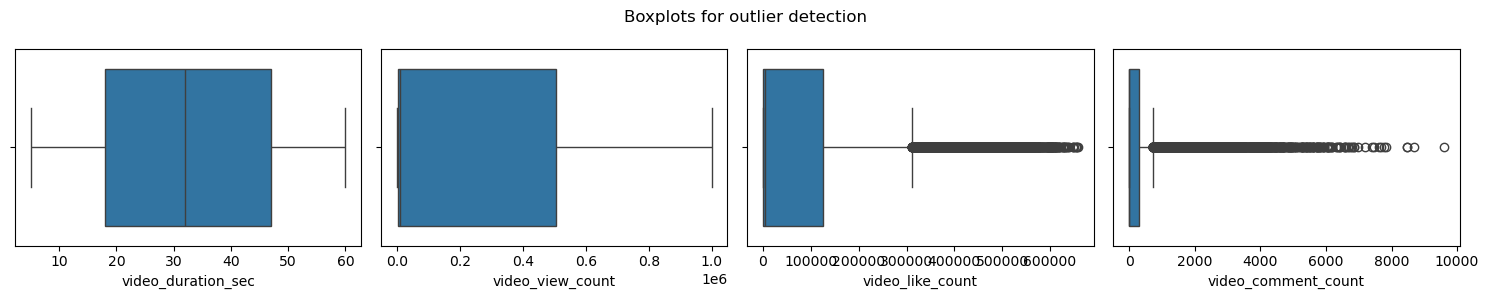

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['video_duration_sec'])
sns.boxplot(ax=axes[1], x=df['video_view_count'])
sns.boxplot(ax=axes[2], x=df['video_like_count'])
sns.boxplot(ax=axes[3], x=df['video_comment_count'])
plt.tight_layout()
plt.show()

> The box plot visualization highlights the following for outlier detection:
>
> - **Video Duration:** No significant outliers.
> - **Video View Count:** Even distribution, no clear outliers.
> - **Video Like Count:** Some high-value outliers are present.
> - **Video Comment Count:** Numerous high-value outliers, indicating skewed data.
>
> Next, we can use the IQR method to detect and handle these outliers.

In [34]:
# Create a DataFrame from describe() for 'video_like_count' and 'video_comment_count'
summary_stats = df[['video_like_count', 'video_comment_count']].describe()

# Calculate IQR, upper_bound, and lower_bound
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create DataFrames for IQR, lower_bound, and upper_bound
iqr_df = pd.DataFrame({'video_like_count': IQR['video_like_count'], 'video_comment_count': IQR['video_comment_count']}, index=['IQR'])
lower_bound_df = pd.DataFrame({'video_like_count': lower_bound['video_like_count'], 'video_comment_count': lower_bound['video_comment_count']}, index=['Lower Bound'])
upper_bound_df = pd.DataFrame({'video_like_count': upper_bound['video_like_count'], 'video_comment_count': upper_bound['video_comment_count']}, index=['Upper Bound'])

# Concatenate DataFrames to insert the rows
summary_stats = pd.concat([summary_stats, iqr_df, lower_bound_df, upper_bound_df])

# Display the updated summary_stats
print("Summary Stats")
summary_stats

Summary Stats
Summary Stats


,video_like_count,video_comment_count
count,"19,084.000","19,084.000"
mean,"83,360.010",232.943
std,"130,160.228",386.322
min,0.000,0.000
25%,810.750,1.000
50%,"3,403.500",9.000
75%,"125,020.000",292.000
max,"497,647.750","1,165.000"
IQR,"124,209.250",291.000
Lower Bound,"-185,503.125",-435.500


In [35]:
# Display potential outliers
outliers = ((df[['video_like_count', 'video_comment_count']] < lower_bound) | (df[['video_like_count', 'video_comment_count']] > upper_bound)).any(axis=1)
potential_outliers = df[outliers][['video_like_count', 'video_comment_count']]

print("Potential Outliers:")
potential_outliers

Potential Outliers:
Potential Outliers:


,video_like_count,video_comment_count
5,"175,546.000","1,165.000"
6,"486,192.000","1,165.000"
9,"171,051.000","1,165.000"
12,"434,565.000","1,165.000"
13,"497,236.000",805.000
...,...,...
9594,"179,191.000",747.000
9597,"497,647.750","1,165.000"
9603,"460,743.000","1,165.000"
9604,"360,080.000","1,165.000"


Now impute the maximum value as Q3 + (3 * IQR)

In [36]:
# Check for and handle outliers for video_like_count
# Now impute the maximum value as Q3 + (3 * IQR) for video_like_count
Q1 = np.percentile(df['video_like_count'],25)
Q3 = np.percentile(df['video_like_count'],75)
IQR = Q3 - Q1

upper_threshold = Q3 + 3*IQR
count_upper = sum(df.video_like_count > upper_threshold)

bold_text = '\033[1m'
reset_format = '\033[0m'

print('Handle outliers for video_like_count :')
print(f'Upper threshold (Q3 + 3*IQR) : {bold_text}{upper_threshold}{reset_format}')
print(f'There are {bold_text}{count_upper}{reset_format}{reset_format} videos with like count higher than the Upper threshold')
print()
# Reassign values > threshold to threshold
#df[df.video_like_count > upper_threshold]["video_like_count"] = upper_threshold
#df.loc[df["video_like_count"] > upper_threshold, "video_like_count"] = upper_threshold
df["video_like_count"] = np.minimum(df["video_like_count"], upper_threshold)
print(df["video_like_count"].describe())

Handle outliers for video_like_count :
Upper threshold (Q3 + 3*IQR) : 497647.75
There are 0 videos with like count higher than the Upper threshold

count    19,084.000
mean     83,360.010
std     130,160.228
min           0.000
25%         810.750
50%       3,403.500
75%     125,020.000
max     497,647.750
Name: video_like_count, dtype: float64
Handle outliers for video_like_count :
Upper threshold (Q3 + 3*IQR) : 497647.75
There are 0 videos with like count higher than the Upper threshold

count    19,084.000
mean     83,360.010
std     130,160.228
min           0.000
25%         810.750
50%       3,403.500
75%     125,020.000
max     497,647.750
Name: video_like_count, dtype: float64


In [37]:
# Check for and handle outliers for video_comment_count
# Now impute the maximum value as Q3 + (3 * IQR) for video_comment_count
Q1 = np.percentile(df['video_comment_count'],25)
Q3 = np.percentile(df['video_comment_count'],75)
IQR = Q3 - Q1

upper_threshold = Q3 + 3*IQR
count_upper = sum(df.video_comment_count > upper_threshold)

bold_text = '\033[1m'
reset_format = '\033[0m'

print('Handle outliers for video_comment_count :')
print(f'Upper threshold (Q3 + 3*IQR) : {bold_text}{upper_threshold}{reset_format}')
print(f'There are {bold_text}{count_upper}{reset_format} videos with comment count higher than the Upper threshold')
print()
# Reassign values > threshold to threshold
# df[df.video_comment_count > upper_threshold]["video_comment_count"] = upper_threshold
# df.loc[df["video_comment_count"] > upper_threshold, "video_comment_count"] = upper_threshold
df["video_comment_count"] = np.minimum(df["video_comment_count"], upper_threshold)
print(df["video_comment_count"].describe())

Handle outliers for video_comment_count :
Upper threshold (Q3 + 3*IQR) : 1165.0
There are 0 videos with comment count higher than the Upper threshold

count   19,084.000
mean       232.943
std        386.322
min          0.000
25%          1.000
50%          9.000
75%        292.000
max      1,165.000
Name: video_comment_count, dtype: float64
Handle outliers for video_comment_count :
Upper threshold (Q3 + 3*IQR) : 1165.0
There are 0 videos with comment count higher than the Upper threshold

count   19,084.000
mean       232.943
std        386.322
min          0.000
25%          1.000
50%          9.000
75%        292.000
max      1,165.000
Name: video_comment_count, dtype: float64


Check class balance.

In [39]:
# Check class balance for verified_status
df['verified_status'].value_counts(normalize=True)

verified_status
not verified   0.937
verified       0.063
Name: proportion, dtype: float64

It is evident that the target variable `verified_status` exhibits a high level of ***imbalance*** in our dataset. Approximately 93.7% of the dataset corresponds to videos posted by unverified accounts, while only 6.3% represents videos posted by verified accounts.

To address this imbalance, one potential technique is to use **oversampling of the minority class**. This involves replicating instances of the minority class to achieve a more balanced class distribution.

In [40]:
# Create a DataFrame with the class labels and features

# Identify data points from majority and minority classes
majority_class = df[df["verified_status"] == "not verified"]
minority_class = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
upsampled_minority = minority_class.sample(len(majority_class), replace=True, random_state=42)

# upsampled_minority = resample(minority_class,
#                                 replace=True,                 # to sample with replacement
#                                 n_samples=len(majority_class), # to match majority class
#                                 random_state=42)               # to create reproducible results

# Combine majority class with upsampled minority class
df_resampled = pd.concat([majority_class, upsampled_minority]).reset_index(drop=True)

# Display new class counts
df_resampled['verified_status'].value_counts(normalize=True)

verified_status
not verified   0.500
verified       0.500
Name: proportion, dtype: float64

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [41]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_resampled['len_transcription_text'] = df_resampled['video_transcription_text'].apply(lambda x: len(str(x)))

In [42]:
# Display first few rows of dataframe after adding new column
df_resampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,len_transcription_text
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,"343,296.000","19,425.000",241.000,1.000,0.000,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,"140,877.000","77,355.000","19,034.000","1,161.000",684.000,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,"902,185.000","97,690.000","2,858.000",833.000,329.000,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,"437,506.000","239,954.000","34,812.000","1,234.000",584.000,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,"56,167.000","34,987.000","4,110.000",547.000,152.000,128


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [43]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
df_resampled.groupby('verified_status')[['len_transcription_text']].mean()

,len_transcription_text
verified_status,
not verified,89.401
verified,84.563


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

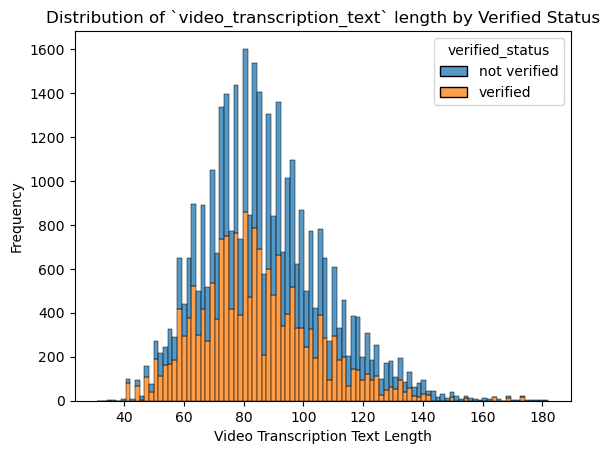

In [44]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(x='len_transcription_text', multiple = 'stack', data = df_resampled,
             hue='verified_status')
# Set plot title and subtitle
plt.title("Distribution of `video_transcription_text` length by Verified Status")
plt.xlabel("Video Transcription Text Length")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

- First, we need to drop feature that are redundant, irrelevant or not avaialble in development of prediction:

In [26]:
# Drop feature that are redundant, irrelevant or not avaialble in development of prediction
columns_to_drop = ['#','video_id','video_transcription_test']
df2 = df_resampled.drop(columns = columns_to_drop,errors='ignore')

- Then, code a correlation matrix

In [27]:
# Code a correlation matrix to help determine most correlated variables
correlation_matrix = df2.corr(numeric_only=True)
correlation_matrix

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,len_transcription_text
video_duration_sec,1.000,0.014,0.004,0.002,0.007,0.000,-0.005
video_view_count,0.014,1.000,0.835,0.710,0.692,0.716,0.247
video_like_count,0.004,0.835,1.000,0.850,0.828,0.783,0.207
video_share_count,0.002,0.710,0.850,1.000,0.710,0.669,0.176
video_download_count,0.007,0.692,0.828,0.710,1.000,0.827,0.175
video_comment_count,0.000,0.716,0.783,0.669,0.827,1.000,0.201
len_transcription_text,-0.005,0.247,0.207,0.176,0.175,0.201,1.000


Visualize a correlation heatmap of the data.

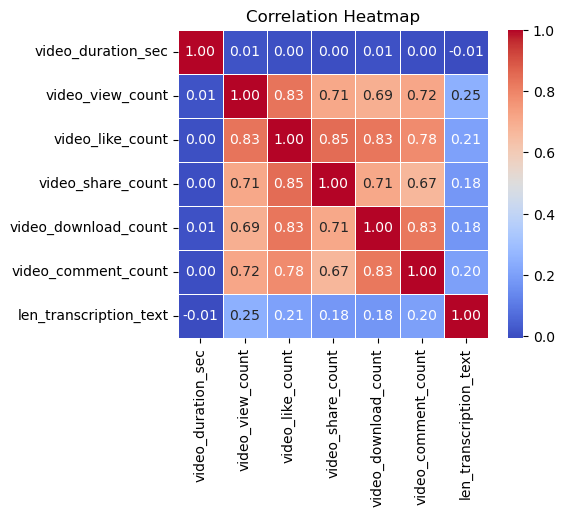

In [28]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

> From the correlation heatmap, these variables show high correlation:
>
> - `video_like_count` has three correlation coefficients greater than 0.8
> 

- `video_view_count` and `video_like_count` have a correlation coefficient greater than 0.8. However, it's important to note that `video_like_count` has three correlation coefficients greater than 0.8, while `video_view_count` has only one. Given this, for model building purposes, we recommend excluding `video_like_count` and retaining the remaining features."

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [29]:
# Select outcome variable
Y = df_resampled['verified_status']

Select the features.

In [30]:
# Select features
X = df_resampled[['claim_status','video_duration_sec','author_ban_status','video_view_count','video_share_count',
                  'video_download_count','video_comment_count']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,"343,296.000",241.000,1.000,0.000
1,claim,32,active,"140,877.000","19,034.000","1,161.000",684.000
2,claim,31,active,"902,185.000","2,858.000",833.000,329.000
3,claim,25,active,"437,506.000","34,812.000","1,234.000",584.000
4,claim,19,active,"56,167.000","4,110.000",547.000,152.000


### **Task 3b. Encode variables**

#### Encode categorical variables of the features.

Check the data types of the features.

In [31]:
X.dtypes

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the X set using an appropriate method.

In [32]:
### Select the features that needs to be encoded
# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features
X_to_encode = X[categorical_features]

# or Identify categorical columns directly to encode
# X_to_encode = X[['claim_status', 'author_ban_status']]

# Display first few rows
X_to_encode.head()

,claim_status,author_ban_status
0,claim,under review
1,claim,active
2,claim,active
3,claim,active
4,claim,active


In [33]:
# Create OneHotEncoder for categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first', categories='auto')

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(X_to_encode)

# Convert X_encoded to a DataFrame with column names
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# Drop the original categorical features from X
# X = X.drop(categorical_features, axis=1)

# Combine the encoded categorical features with the numerical features
X_final = pd.concat([X_encoded_df, X.drop(categorical_features, axis=1).reset_index(drop=True)], axis=1)
X_final

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(sparse=False, drop='first')

In [ ]:
# Fit and transform the training features using the encoder
X_encoded = encoder.fit_transform(X_to_encode)

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# # Get feature names after encoding
feature_names = encoder.get_feature_names_out()
feature_names

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [ ]:
# Display first few rows of encoded features
### YOUR CODE HERE ###
X_encoded

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [ ]:
# Place encoded features (which is currently an array) into a dataframe
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# Display first few rows
X_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
# Concatenate the encoded values and drop the original 'claim_status','author_ban_status' columns
X_final = (pd.concat([X,X_encoded_df ], axis=1)).drop(columns=["claim_status", "author_ban_status"])
#X.drop(columns=["claim_status", "author_ban_status"])
X_final

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,241.0,1.0,0.0,0.0,0.0,1.0
1,32,140877.0,19034.0,1161.0,684.0,0.0,0.0,0.0
2,31,902185.0,2858.0,833.0,329.0,0.0,0.0,0.0
3,25,437506.0,34812.0,1234.0,584.0,0.0,0.0,0.0
4,19,56167.0,4110.0,547.0,152.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35763,21,1920.0,60.0,6.0,1.0,1.0,0.0,0.0
35764,16,8323.0,775.0,40.0,15.0,1.0,0.0,0.0
35765,27,5140.0,98.0,7.0,2.0,1.0,0.0,0.0
35766,34,956917.0,88107.0,3391.0,1165.0,0.0,0.0,0.0


#### Encode categorical variables of the outcome.

Check the data types of the features.

In [ ]:
Y.head()

0    not verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verified_status, dtype: object

### **Task 3c. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Check data types
X_final.dtypes

claim_status_opinion              float64
author_ban_status_banned          float64
author_ban_status_under review    float64
video_duration_sec                  int64
video_view_count                  float64
video_share_count                 float64
video_download_count              float64
video_comment_count               float64
dtype: object

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26826, 8) (8942, 8) (26826,) (8942,)


In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
33058,6,238.0,6.0,0.0,0.0,1.0,0.0,0.0
20491,51,5002.0,480.0,12.0,1.0,1.0,0.0,0.0
25583,32,2042.0,145.0,11.0,3.0,1.0,0.0,0.0
18474,24,2334.0,13.0,17.0,0.0,1.0,0.0,0.0
27312,9,7125.0,365.0,19.0,6.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
y_train.dtypes

dtype('O')

In [ ]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

**Notes:** In this test, we won't encode outcome variables

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
#y_encoder = OneHotEncoder(sparse=False, drop='first')

In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
# y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()


# Display the encoded training outcome variable
### YOUR CODE HERE ###
# y_train_final

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
model = LogisticRegression(random_state=0).fit(X_train, y_train)
#model

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`


# Display first few rows
X_test

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,1.0,0.0,0.0,27,519.0,65.0,1.0,0.0
31748,1.0,0.0,0.0,60,7539.0,181.0,0.0,0.0
20197,1.0,0.0,0.0,59,5129.0,179.0,2.0,0.0
5727,0.0,0.0,0.0,19,792813.0,56597.0,5146.0,1165.0
11607,1.0,0.0,0.0,54,2044.0,68.0,19.0,2.0
...,...,...,...,...,...,...,...,...
14756,1.0,0.0,0.0,34,5928.0,364.0,33.0,10.0
26564,1.0,0.0,0.0,30,4861.0,86.0,4.0,1.0
14800,1.0,0.0,0.0,55,2744.0,416.0,9.0,2.0
35705,1.0,0.0,0.0,42,6278.0,94.0,21.0,1.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = model.predict(X_test)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
y_pred

array(['verified', 'verified', 'verified', ..., 'verified', 'verified',
       'verified'], dtype=object)

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
#y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
#y_test_final

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

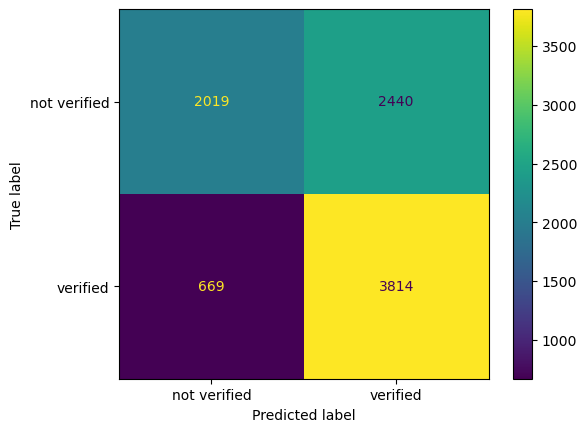

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute values for confusion matrix
#log_cm = confusion_matrix(y_test_final, y_pred, labels=model.classes_)
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)


# Create display of confusion matrix
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=model.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
# Create a classification report
#import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='verified')
recall = recall_score(y_test, y_pred, pos_label='verified')
f1 = f1_score(y_test, y_pred, pos_label='verified')

print("Classification Report:\n")
# Print the results
print('Accuracy: %.6f' % accuracy)
print('Precision: %.6f' % precision)
print('Recall: %.6f' % recall)
print('F1 Score: %.6f' % f1)

Classification Report:

Accuracy: 0.652315
Precision: 0.609850
Recall: 0.850770
F1 Score: 0.710441


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report and accuracy
bold_text = '\033[1m'
reset_format = '\033[0m'

print(f'{bold_text}Classification Report:\n{reset_format}{report}')
print(f'{bold_text}Accuracy:{reset_format} %.6f' % accuracy)

Classification Report:
              precision    recall  f1-score   support

not verified       0.75      0.45      0.56      4459
    verified       0.61      0.85      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.68      0.65      0.64      8942
weighted avg       0.68      0.65      0.64      8942

Accuracy: 0.652315


**Interpret the Classification Report**:
- **Accuracy (0.652315)**:
Accuracy is the ratio of correctly predicted instances to the total instances. In this case, the model achieved an accuracy of approximately 65.2%.
- **Precision (0.609850)**:
Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this context, precision represents the ability of the model to correctly identify verified accounts among all instances predicted as verified. A precision of 0.609 suggests that about 60.9% of the instances predicted as verified are indeed verified.
- **Recall (0.850770)**:
Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. In this context, recall represents the ability of the model to capture all verified accounts among all actual verified instances. A recall of 0.850 indicates that the model captured approximately 85% of the actual verified instances.
- **F1 Score (0.710441)**:
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives. The F1 score ranges from 0 to 1, where a higher score indicates a better balance between precision and recall. In this case, the F1 score is approximately 0.710, reflecting a reasonable balance between precision and recall.


### **Task 4c. Interpret model coefficients**

In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability

#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

# Get feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})

# Print the DataFrame
print(coef_df)

                          Feature  Coefficient
0              video_duration_sec     0.008782
1                video_view_count    -0.000002
2               video_share_count     0.000007
3            video_download_count    -0.000079
4             video_comment_count    -0.000154
5            claim_status_opinion     0.000384
6        author_ban_status_banned    -0.000016
7  author_ban_status_under review    -0.000004


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?


==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

#### Classification Report:
Let's interpret the classification report results

1. **Accuracy: 0.652315**
Approximately 65.23% of the predictions made by the model are correct. This metric gives an overall measure of how well the model is performing.
2. **Precision: 0.609850**
About 60.98% of the instances predicted as 'verified' by the model are actually 'verified'. Precision is a measure of the accuracy of positive predictions.
3. **Recall: 0.850770**
The model successfully captures approximately 85.08% of the actual 'verified' instances. Recall (Sensitivity) measures the ability of the model to identify all positive instances.
4. **F1 Score: 0.710441**
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the F1 score is 71.04%, indicating a reasonable balance between precision and recall.

##### Interpretation:
- The accuracy suggests that the model performs decently well overall, correctly classifying about 65% of instances.
- The precision of 60.98% indicates that when the model predicts a video as 'verified', it is correct about 61% of the time.
- The recall of 85.08% suggests that the model captures the majority (about 85%) of the actual 'verified' videos.
- The F1 score, which considers both precision and recall, is at 71.04%, indicating a good balance between precision and recall.
##### Action Points:
- If there are specific business objectives or requirements, assess whether the current performance meets those criteria.
- Consider the specific implications of false positives and false negatives based on the application (e.g., the consequences of misclassifying a video).
- Depending on the context, you may need to fine-tune the model, adjust the decision threshold, or explore additional features to improve performance.

#### Feature Coefficients:
Let's interpret the feature coefficients:

* **video_duration_sec (Coefficient: 0.008782):**
A one-unit increase in video duration is associated with an increase in the log-odds by approximately 0.008782. This suggests that longer video durations may contribute positively to the likelihood of the positive class.
* **video_view_count (Coefficient: -0.000002):**
A one-unit increase in video view count is associated with a decrease in the log-odds by approximately 0.000002. This implies that higher view counts may have a slightly negative impact on the likelihood of the positive class.
* **video_share_count (Coefficient: 0.000007):**
A one-unit increase in video share count is associated with an increase in the log-odds by approximately 0.000007. This suggests that higher share counts may contribute positively to the likelihood of the positive class.
* **video_download_count (Coefficient: -0.000079):**
A one-unit increase in video download count is associated with a decrease in the log-odds by approximately 0.000079. This implies that higher download counts may have a slightly negative impact on the likelihood of the positive class.
* **video_comment_count (Coefficient: -0.000154):**
A one-unit increase in video comment count is associated with a decrease in the log-odds by approximately 0.000154. This suggests that higher comment counts may have a slightly negative impact on the likelihood of the positive class.
* **claim_status_opinion (Coefficient: 0.000384):**
A one-unit increase in claim status opinion is associated with an increase in the log-odds by approximately 0.000384. This suggests that a positive claim status opinion may contribute positively to the likelihood of the positive class.
* **author_ban_status_banned (Coefficient: -0.000016):**
A video from a banned author is associated with a decrease in the log-odds by approximately 0.000016. This implies that videos from banned authors may have a slightly negative impact on the likelihood of the positive class.
* **author_ban_status_under review (Coefficient: -0.000004):**
A video from an author under review is associated with a decrease in the log-odds by approximately 0.000004. This suggests that videos from authors under review may have a slightly negative impact on the likelihood of the positive class.

##### Interpretation:
* Features with positive coefficients contribute positively to the likelihood of the positive class, while those with negative coefficients have a negative impact.
* The magnitudes of the coefficients indicate the strength of the impact each feature has on the log-odds of the positive class.
* Interpretation should be context-specific and may require domain knowledge to understand the practical implications of the feature coefficients.
##### Action Points:
* Consider the practical implications of the coefficients in the context of your application or problem domain.
* Features with larger absolute coefficients are more influential. Prioritize understanding and potentially addressing issues or opportunities associated with these features.
* The feature coefficients can guide decisions on feature importance, but the overall model performance should be considered in conjunction with these coefficients.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 